# How people in San Fransisco Bay Area use the Bay Wheels?
## by Soya AOKI

## Investigation Overview

> This presentation shows results of investigation how people in San Fransisco Bay Area use the Bay Wheels. Summarized results are shown bellow.

> ・THERE IS DIFFERENCE OF USAGE BETWEEN SUBSCRIBERS AND CUSTMERS.
    - Subscribers use the bike in short time on weekdays.
    - Costomers use the bike on holidays.

## Dataset Overview

> System Data of Bay Weels(https://www.lyft.com/bikes/bay-wheels/system-data).
> Each trip in the Dataset is anonymized and includes:
    - Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
    - Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
    - End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
    - Bike ID
    - Bike Share for All (https://www.lyft.com/bikes/bay-wheels/bike-share-for-all)
    - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv("df_master.csv")
color_palette = sb.color_palette()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Two types of users - Subscriber and Customer.

> In the dataset, there are two types of users, Customer and Subscriber. Customer accounts for about 15% of the total. So there are over 85% data of Subscriber. Please refer Sub-Slide (Push "↓").

>　We thought that different types of users would have different characteristics of use.　Next step, we investigated differences of usage the service between Customer and Subscriber.

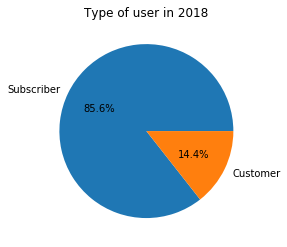

In [3]:
plt.pie(df_clean['user_type'].value_counts(), labels=df_clean['user_type'].unique(), autopct="%1.1f%%")
plt.title("Type of user in 2018");

## When people uses the service? (by type of user)

> First of all, difference of usage between month was investigated. As a result, there was no difference by type of user. In summer season, the usage increased. Please refer Sub-Slide (Push "↓").　Summer season has comfortable temperature to ride bike, so effect of temperature is likely to be significant.

> Next, we investigated differences of usage the service in the point of view of day of week and hour.

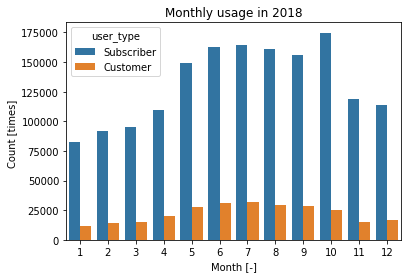

In [4]:
sb.countplot(data=df_clean, x='start_month', hue='user_type')
plt.title("Monthly usage in 2018")
plt.xlabel("Month [-]")
plt.ylabel("Count [times] ");

## When people uses the service? (by type of user)

> In Sub-Slide, result of weekly and hourly usage are shown. Please refer Sub-Slide (Push "↓").　An interesting fact has been revealed.　Subscribers tend to use the bike on weekday, at around 8 a.m and 5 p.m. Generally, around 8 a.m and 5 p.m are timezone to commute. So it is likely that Subscribers use the service for commuting. On the other hand, Customers tend to  use on holidays, at around 1 p.m. It is likely that Customers use the service for leisure.

> Finally, we investigated differences of trip's duration by type of user.

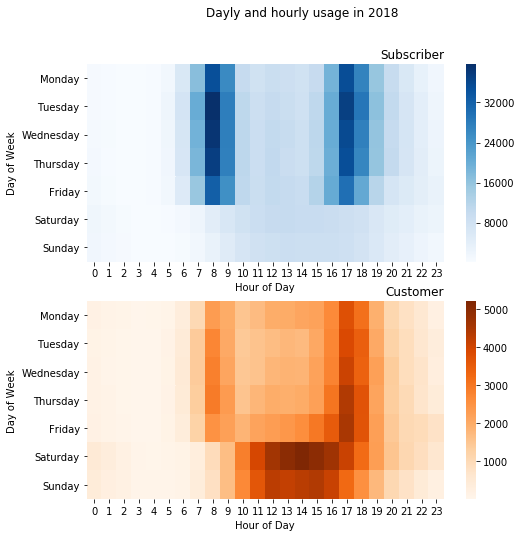

In [5]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_hour', values='count')
ax = sb.heatmap(st_counts, cmap="Blues");
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='horizontal')
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
ax = sb.heatmap(ct_counts, cmap="Oranges");
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='horizontal')
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.suptitle("Dayly and hourly usage in 2018");

## How long people uses the service? (by type of user)

> Subscribers use the service in short time more than Customers.　Please refer Sub-Slide (Push "↓"). This is a reasonable result given that subscribers use it for commuting and consumers use it for laisure.


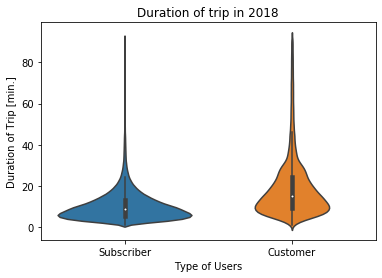

In [6]:
sb.violinplot(data=df_clean, x='user_type', y='duration_min')
plt.title("Duration of trip in 2018")
plt.xlabel("Type of Users")
plt.ylabel("Duration of Trip [min.]");

## Conclusions

- There are two types of users, Customer(15%) and Subscriber(85%).

- In summer season, usage of the service increased, regardless of the type of user. The effect of temperature is likely to be significant.

- Subscribers tend to use on weekday, at around 8 a.m and 5 p.m. So it is likely that Subscribers use the service for commuting. On the other hand, Customers tend to use on holidays, at around 1 p.m. It is likely that Customers use the service for leisure.

- Subscribers use the service in short time more than Customers. This is a reasonable result given that Subscribers use it for commuting and Costomers use it for laisure.

## Suggestions

- Making plans to subscribe for commiting/laisure makes customers more satisfied probably.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!